# Store sales prediction at Favorita stores located in Ecuador

  In this project we will be trying to create a machinelearning models that predicts the stores at favorita stores.

![](https://i.imgur.com/6MYc56a.png)


Let's begin by installing the required libraries.

In [ ]:
#restart the kernel after installation
!pip install numpy pandas-profiling matplotlib seaborn --quiet

In [ ]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet


     |████████████████████████████████| 68 kB 3.0 MB/s 
     |████████████████████████████████| 193.6 MB 56 kB/s 
     |████████████████████████████████| 47 kB 3.2 MB/s 
     |████████████████████████████████| 2.0 MB 43.7 MB/s 
     |████████████████████████████████| 9.7 MB 36.9 MB/s 


## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll learn gradient boosting by applying it to a real-world dataset from the [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) competition on Kaggle:

>
> View and download the data here: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

In [ ]:
!pip install jovian --upgrade --quiet
import jovian
jovian.commit(project='python-Storesales prediction using ML(course project)', privacy='public')

jovian.commit()




[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library. 

In [ ]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [ ]:
od.download('https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: akashdominicthomas
Your Kaggle Key: ··········


100%|██████████| 21.4M/21.4M [00:00<00:00, 73.0MB/s]



Extracting archive ./store-sales-time-series-forecasting/store-sales-time-series-forecasting.zip to ./store-sales-time-series-forecasting


You'll be asked to provide your Kaggle credentials to download the data. Follow these instructions: http://bit.ly/kaggle-creds

In [ ]:
os.listdir('/content/store-sales-time-series-forecasting')

['holidays_events.csv',
 'oil.csv',
 'transactions.csv',
 'test.csv',
 'stores.csv',
 'sample_submission.csv',
 'train.csv']

Let's load the data into Pandas dataframes.

In [ ]:
test_df = pd.read_csv('./store-sales-time-series-forecasting/test.csv', low_memory=False)
store_df = pd.read_csv('./store-sales-time-series-forecasting/stores.csv')
train_df = pd.read_csv('./store-sales-time-series-forecasting/train.csv')
submission_df = pd.read_csv('./store-sales-time-series-forecasting/sample_submission.csv')
oil_df = pd.read_csv('./store-sales-time-series-forecasting/oil.csv')
transactions_df = pd.read_csv('./store-sales-time-series-forecasting/transactions.csv')
holidays_df = pd.read_csv('./store-sales-time-series-forecasting/holidays_events.csv')


In [ ]:
test_df.head(10)

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
5,3000893,2017-08-16,1,BREAD/BAKERY,12
6,3000894,2017-08-16,1,CELEBRATION,0
7,3000895,2017-08-16,1,CLEANING,25
8,3000896,2017-08-16,1,DAIRY,45
9,3000897,2017-08-16,1,DELI,18


In [ ]:
store_df.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
submission_df.head(10)

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
5,3000893,0.0
6,3000894,0.0
7,3000895,0.0
8,3000896,0.0
9,3000897,0.0


In [ ]:
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [ ]:
holidays_df.head(10)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [ ]:
transactions_df.head(10)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [ ]:
oil_df.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


Let's merge the informations into `train_df` and `test_df`.

In [ ]:
merged_dfstore = train_df.merge(store_df, how='left', on='store_nbr')
merged_test_dfstore = test_df.merge(store_df, how='left', on='store_nbr')


In [ ]:
merged_test_dfstore.head(10)

,id,date,store_nbr,family,onpromotion,city,state,type,cluster
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13
5,3000893,2017-08-16,1,BREAD/BAKERY,12,Quito,Pichincha,D,13
6,3000894,2017-08-16,1,CELEBRATION,0,Quito,Pichincha,D,13
7,3000895,2017-08-16,1,CLEANING,25,Quito,Pichincha,D,13
8,3000896,2017-08-16,1,DAIRY,45,Quito,Pichincha,D,13
9,3000897,2017-08-16,1,DELI,18,Quito,Pichincha,D,13


In [ ]:
merged_dfoil = merged_dfstore.merge(oil_df, how='left', on='date')
merged_test_dfoil = merged_test_dfstore.merge(oil_df, how='left', on='date')

In [ ]:
merged_df = merged_dfoil.merge(holidays_df, how='left', on='date')
merged_test_df = merged_test_dfoil.merge(holidays_df, how='left', on='date')

In [ ]:
% merged_df = merged_dfhol.merge(transactions_df, how='left', on='date')
% merged_test_df = merged_test_dfhol.merge(transactions_df, how='left', on='date')

UsageError: Line magic function `%` not found.


Now lets change the holiday column values so that it can used in training the model.Events,additional will have same impact on sales as holiday.Bridge day will be same as normal day.

In [ ]:
merged_df.rename(columns = {'type_y':'Holiday'}, inplace = True)
merged_test_df.rename(columns = {'type_y':'Holiday'}, inplace = True)


In [ ]:
merged_df['Holiday'] = merged_df['Holiday'].replace(['Holiday'],1)
merged_test_df['Holiday'] = merged_test_df['Holiday'].replace(['Holiday'],1)
merged_df['Holiday'] = merged_df['Holiday'].replace(['Work Day'],0)
merged_test_df['Holiday'] = merged_test_df['Holiday'].replace(['Work Day'],0)
merged_df['Holiday'] = merged_df['Holiday'].replace(['Additional'],1)
merged_test_df['Holiday'] = merged_test_df['Holiday'].replace(['Additional'],1)
merged_df['Holiday'] = merged_df['Holiday'].replace(['Event'],1)
merged_test_df['Holiday'] = merged_test_df['Holiday'].replace(['Event'],1)
merged_df['Holiday'] = merged_df['Holiday'].replace(['Bridge'],0)
merged_test_df['Holiday'] = merged_test_df['Holiday'].replace(['Bridge'],0)
merged_df['Holiday'] = merged_df['Holiday'].replace(['Transfer'],0)
merged_test_df['Holiday'] = merged_test_df['Holiday'].replace(['Transfer'],0)


merged_df['transferred'] = merged_df['transferred'].replace([False],0)
merged_test_df['transferred'] = merged_test_df['transferred'].replace([False],0)
merged_df['transferred'] = merged_df['transferred'].replace([True],1)
merged_test_df['transferred'] = merged_test_df['transferred'].replace([True],1)


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type_x       object 
 9   cluster      int64  
 10  dcoilwtico   float64
 11  Holiday      float64
 12  locale       object 
 13  locale_name  object 
 14  description  object 
 15  transferred  float64
dtypes: float64(4), int64(4), object(8)
memory usage: 396.1+ MB


In [ ]:
merged_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,Holiday,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,1.0,Local,Riobamba,Fundacion de Riobamba,0.0
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,1.0,Local,Riobamba,Fundacion de Riobamba,0.0
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,1.0,Local,Riobamba,Fundacion de Riobamba,0.0
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,1.0,Local,Riobamba,Fundacion de Riobamba,0.0


Let's save our work before continuing.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


# **Exploitary  Data Analysis**

Let's look more deeply into the data to find some correlation between inputs and targets.

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type_x       object 
 9   cluster      int64  
 10  dcoilwtico   float64
 11  Holiday      float64
 12  locale       object 
 13  locale_name  object 
 14  description  object 
 15  transferred  float64
dtypes: float64(4), int64(4), object(8)
memory usage: 396.1+ MB


Days of the months have significant impact on the sales. So lets extract days from the dates.

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(merged_df)
split_date(merged_test_df)

In [ ]:
merged_df.head(10)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,Holiday,locale,locale_name,description,transferred,Date,Year,Month,Day,WeekOfYear
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
6,6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
7,7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
8,8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
9,9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1


# Preprocessing and Feature Engineering 

Before analysing the data we need impute (add missing data), scale the data and encode it for better understanding.

# Imputing

In [ ]:
merged_df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'state', 'type_x', 'cluster', 'dcoilwtico', 'Holiday', 'locale',
       'locale_name', 'description', 'transferred', 'Date', 'Year', 'Month',
       'Day', 'WeekOfYear'],
      dtype='object')

In [ ]:
input_cols = [ 'store_nbr', 'family','onpromotion','type_x', 'cluster', 'dcoilwtico', 'Holiday','transferred','Month','Day', 'WeekOfYear','Year']
target_col = 'sales'

Making Training and Validation sets for the model.

In [ ]:
year = pd.to_datetime(merged_df.Date).dt.year

In [ ]:
train_df=merged_df[ year <= 2015]
val_df=merged_df[ year > 2016] 

In [ ]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,Holiday,locale,locale_name,description,transferred,Date,Year,Month,Day,WeekOfYear
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,1.0,National,Ecuador,Primer dia del ano,0.0,2013-01-01,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972669,1945939,2015-12-31,9,POULTRY,734.391,0,Quito,Pichincha,B,6,37.13,1.0,National,Ecuador,Primer dia del ano-1,0.0,2015-12-31,2015,12,31,53
1972670,1945940,2015-12-31,9,PREPARED FOODS,98.888,0,Quito,Pichincha,B,6,37.13,1.0,National,Ecuador,Primer dia del ano-1,0.0,2015-12-31,2015,12,31,53
1972671,1945941,2015-12-31,9,PRODUCE,2888.340,0,Quito,Pichincha,B,6,37.13,1.0,National,Ecuador,Primer dia del ano-1,0.0,2015-12-31,2015,12,31,53
1972672,1945942,2015-12-31,9,SCHOOL AND OFFICE SUPPLIES,0.000,0,Quito,Pichincha,B,6,37.13,1.0,National,Ecuador,Primer dia del ano-1,0.0,2015-12-31,2015,12,31,53


In [ ]:
train_inputs = train_df[input_cols].copy()
val_inputs = val_df[input_cols].copy()
train_targets= train_df[target_col].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [ ]:
val_targets

2642706       0.000
2642707       0.000
2642708       0.000
2642709       0.000
2642710       0.000
             ...   
3054343     438.133
3054344     154.553
3054345    2419.729
3054346     121.000
3054347      16.000
Name: sales, Length: 411642, dtype: float64

In [ ]:


train_inputs

,store_nbr,family,onpromotion,type_x,cluster,dcoilwtico,Holiday,transferred,Month,Day,WeekOfYear,Year
0,1,AUTOMOTIVE,0,D,13,NaN,1.0,0.0,1,1,1,2013
1,1,BABY CARE,0,D,13,NaN,1.0,0.0,1,1,1,2013
2,1,BEAUTY,0,D,13,NaN,1.0,0.0,1,1,1,2013
3,1,BEVERAGES,0,D,13,NaN,1.0,0.0,1,1,1,2013
4,1,BOOKS,0,D,13,NaN,1.0,0.0,1,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
1972669,9,POULTRY,0,B,6,37.13,1.0,0.0,12,31,53,2015
1972670,9,PREPARED FOODS,0,B,6,37.13,1.0,0.0,12,31,53,2015
1972671,9,PRODUCE,0,B,6,37.13,1.0,0.0,12,31,53,2015
1972672,9,SCHOOL AND OFFICE SUPPLIES,0,B,6,37.13,1.0,0.0,12,31,53,2015


In [ ]:
numeric_cols = [ 'store_nbr','onpromotion', 'cluster', 'dcoilwtico', 'Holiday' ,'Month','Day', 'WeekOfYear' ,'transferred'  ]
categorical_cols = [ 'family','type_x']

In [ ]:
train_inputs[numeric_cols].isna().sum()


store_nbr            0
onpromotion          0
cluster              0
dcoilwtico      604098
Holiday        1675080
Month                0
Day                  0
WeekOfYear           0
transferred    1675080
dtype: int64

In [ ]:
val_inputs[numeric_cols].isna().sum()

store_nbr           0
onpromotion         0
cluster             0
dcoilwtico     135432
Holiday        358182
Month               0
Day                 0
WeekOfYear          0
transferred    358182
dtype: int64

In [ ]:
test_inputs[numeric_cols].isna().sum()

store_nbr          0
onpromotion        0
cluster            0
dcoilwtico      7128
Holiday        26730
Month              0
Day                0
WeekOfYear         0
transferred    26730
dtype: int64

In [ ]:
mean_oil_price = train_inputs.dcoilwtico.mean()

In [ ]:
train_inputs['Holiday'].fillna(0, inplace=True)
val_inputs['Holiday'].fillna(0, inplace=True)
test_inputs['Holiday'].fillna(0, inplace=True)

In [ ]:
train_inputs['dcoilwtico'].fillna(mean_oil_price, inplace=True)
val_inputs['dcoilwtico'].fillna(mean_oil_price, inplace=True)
test_inputs['dcoilwtico'].fillna(mean_oil_price, inplace=True)

In [ ]:
train_inputs['transferred'].fillna(0, inplace=True)
val_inputs['transferred'].fillna(0, inplace=True)
test_inputs['transferred'].fillna(0, inplace=True)

In [ ]:
test_inputs

,store_nbr,family,onpromotion,type_x,cluster,dcoilwtico,Holiday,transferred,Month,Day,WeekOfYear,Year
0,1,AUTOMOTIVE,0,D,13,46.80,0.0,0.0,8,16,33,2017
1,1,BABY CARE,0,D,13,46.80,0.0,0.0,8,16,33,2017
2,1,BEAUTY,2,D,13,46.80,0.0,0.0,8,16,33,2017
3,1,BEVERAGES,20,D,13,46.80,0.0,0.0,8,16,33,2017
4,1,BOOKS,0,D,13,46.80,0.0,0.0,8,16,33,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
28507,9,POULTRY,1,B,6,47.26,0.0,0.0,8,31,35,2017
28508,9,PREPARED FOODS,0,B,6,47.26,0.0,0.0,8,31,35,2017
28509,9,PRODUCE,1,B,6,47.26,0.0,0.0,8,31,35,2017
28510,9,SCHOOL AND OFFICE SUPPLIES,9,B,6,47.26,0.0,0.0,8,31,35,2017


Now lets check for any NaN values in the data.

In [ ]:
test_inputs[numeric_cols].isna().sum()

store_nbr      0
onpromotion    0
cluster        0
dcoilwtico     0
Holiday        0
Month          0
Day            0
WeekOfYear     0
transferred    0
dtype: int64

In [ ]:
train_inputs[categorical_cols].isna().sum()

family    0
type_x    0
dtype: int64

In [ ]:
test_inputs[categorical_cols].isna().sum()

family    0
type_x    0
dtype: int64

Imputation is completed.


# Visualisation

In [ ]:
!pip install plotly matplotlib seaborn --quiet

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
data=train_inputs.join(train_targets)

In [ ]:
data

,store_nbr,family,onpromotion,type_x,cluster,dcoilwtico,Holiday,transferred,Month,Day,WeekOfYear,Year,sales
0,1,AUTOMOTIVE,0,D,13,79.968659,1.0,0.0,1,1,1,2013,0.000
1,1,BABY CARE,0,D,13,79.968659,1.0,0.0,1,1,1,2013,0.000
2,1,BEAUTY,0,D,13,79.968659,1.0,0.0,1,1,1,2013,0.000
3,1,BEVERAGES,0,D,13,79.968659,1.0,0.0,1,1,1,2013,0.000
4,1,BOOKS,0,D,13,79.968659,1.0,0.0,1,1,1,2013,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972669,9,POULTRY,0,B,6,37.130000,1.0,0.0,12,31,53,2015,734.391
1972670,9,PREPARED FOODS,0,B,6,37.130000,1.0,0.0,12,31,53,2015,98.888
1972671,9,PRODUCE,0,B,6,37.130000,1.0,0.0,12,31,53,2015,2888.340
1972672,9,SCHOOL AND OFFICE SUPPLIES,0,B,6,37.130000,1.0,0.0,12,31,53,2015,0.000


In [ ]:
px.histogram(data.sample(100000), x='sales', title='sales Analysis at holidays', color='Holiday')

As we can holidays have less  sales than normal days as one can assume.So Holidays will have significant weight on the sales. Now let us try to find more such parameters having significant impact on the sales. 

In [ ]:
px.scatter(data.sample(50000), 
           title='sales vs Oil price',
           x='sales', 
           y='dcoilwtico',
          color='Holiday' )

We can see that oil prices has a negative impact on the sales.

In [ ]:
px.scatter(data.sample(100000), 
           title='sales vs cluster',
           x='sales', 
           y='cluster',
          color='Holiday')

#Scaling and encoding.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(data[numeric_cols])


In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs

,store_nbr,family,onpromotion,type_x,cluster,dcoilwtico,Holiday,transferred,Month,Day,WeekOfYear,Year
0,0.000000,AUTOMOTIVE,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013
1,0.000000,BABY CARE,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013
2,0.000000,BEAUTY,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013
3,0.000000,BEVERAGES,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013
4,0.000000,BOOKS,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
1972669,0.150943,POULTRY,0.0,B,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015
1972670,0.150943,PREPARED FOODS,0.0,B,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015
1972671,0.150943,PRODUCE,0.0,B,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015
1972672,0.150943,SCHOOL AND OFFICE SUPPLIES,0.0,B,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015


In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(data[categorical_cols])

In [ ]:
categorical_cols

['family', 'type_x']

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs

,store_nbr,family,onpromotion,type_x,cluster,dcoilwtico,Holiday,transferred,Month,Day,WeekOfYear,Year,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_x_A,type_x_B,type_x_C,type_x_D,type_x_E
0,0.000000,AUTOMOTIVE,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,BABY CARE,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,BEAUTY,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,BEVERAGES,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,BOOKS,0.0,D,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972669,0.150943,POULTRY,0.0,B,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1972670,0.150943,PREPARED FOODS,0.0,B,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1972671,0.150943,PRODUCE,0.0,B,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1972672,0.150943,SCHOOL AND OFFICE SUPPLIES,0.0,B,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## Model Preparation and Training

#1. Decision Trees

First we will try to make model with decision trees algorithm for the prediction of sales.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
train_inputs=train_inputs.drop(['family','type_x'],axis=1)
val_inputs=val_inputs.drop(['family','type_x'],axis=1)

In [ ]:
train_inputs

,store_nbr,onpromotion,cluster,dcoilwtico,Holiday,transferred,Month,Day,WeekOfYear,Year,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_x_A,type_x_B,type_x_C,type_x_D,type_x_E
0,0.000000,0.0,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.0,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.0,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.0,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.0,0.7500,0.597064,1.0,0.0,0.0,0.0,0.0,2013,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972669,0.150943,0.0,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1972670,0.150943,0.0,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1972671,0.150943,0.0,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1972672,0.150943,0.0,0.3125,0.033916,1.0,0.0,1.0,1.0,1.0,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
tree = DecisionTreeRegressor(random_state=42)

In [ ]:
%%time
tree.fit(train_inputs, train_targets)

CPU times: user 34.4 s, sys: 585 ms, total: 34.9 s
Wall time: 34.9 s


DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
tree_train_preds = tree.predict(train_inputs)
tree_train_rmse = mean_squared_error(tree_train_preds,train_targets,squared=False)
tree_val_preds = tree.predict(val_inputs)
tree_val_rmse = mean_squared_error(tree_val_preds,val_targets,squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 9.709526218152364e-16, Validation RMSE: 713.212502933469


we can clearly see that training error is very low but validation error is quite high. Now we try to fine tune the hyperparameters inorder to reduce the overfitting.

# Hyperparameter fine tuning.

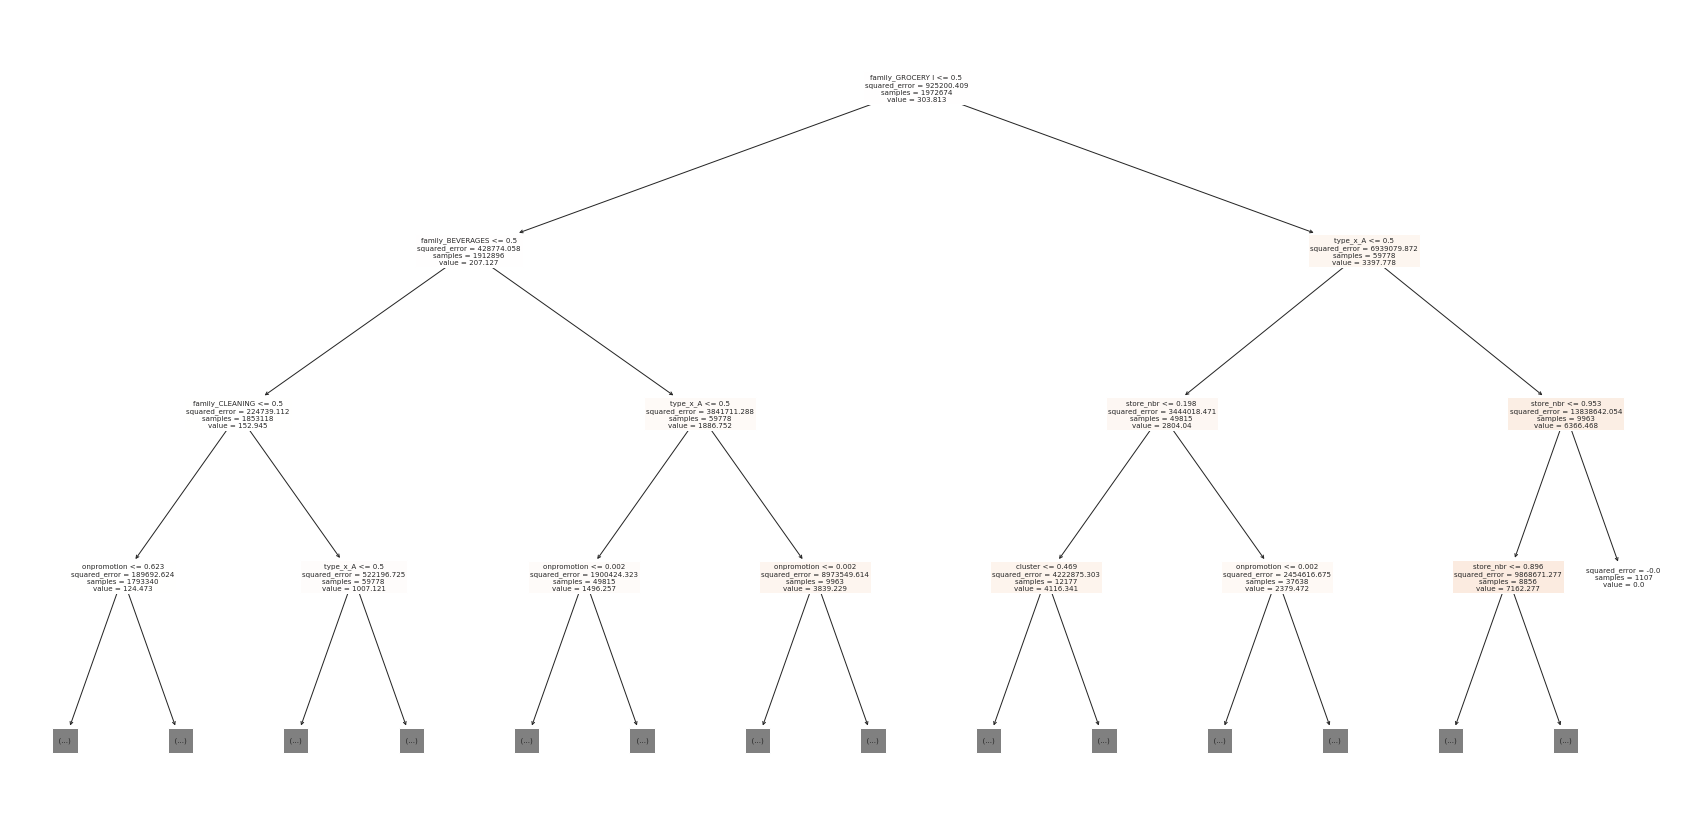

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree
plot_tree(tree, feature_names=train_inputs.columns, max_depth=3, filled=True);

In [ ]:
tree_importances = tree.feature_importances_
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [ ]:
tree_importance_df.head(10)

,feature,importance
22,family_GROCERY I,0.323329
0,store_nbr,0.147387
43,type_x_A,0.103497
13,family_BEVERAGES,0.095381
1,onpromotion,0.061951
3,dcoilwtico,0.055047
2,cluster,0.031810
6,Month,0.031809
17,family_CLEANING,0.024694
8,WeekOfYear,0.024599


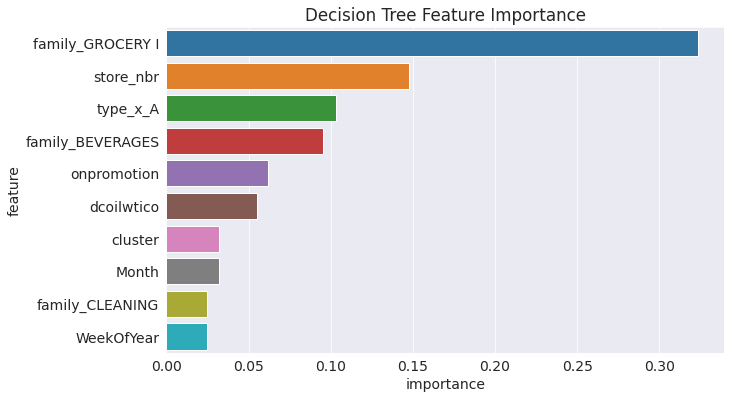

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

From the above data we can see that certain paramters have more influence on the sales.

Lets make helper functions for hypertuning the parameters of the decision tree.

In [ ]:
def test_params(**params):
    model = DecisionTreeRegressor(random_state=42,  **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

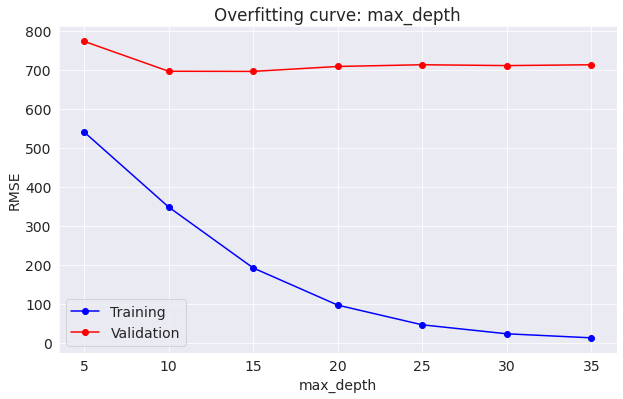

In [ ]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

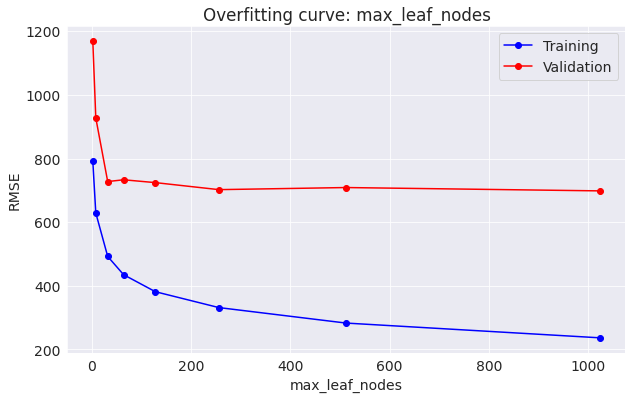

In [ ]:
test_param_and_plot('max_leaf_nodes', [2,8,32,64,128,256,512,1024])

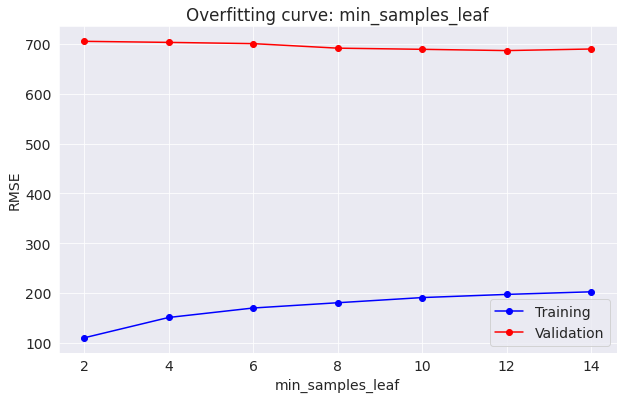

In [ ]:
test_param_and_plot('min_samples_leaf', [2, 4, 6,8, 10, 12, 14])

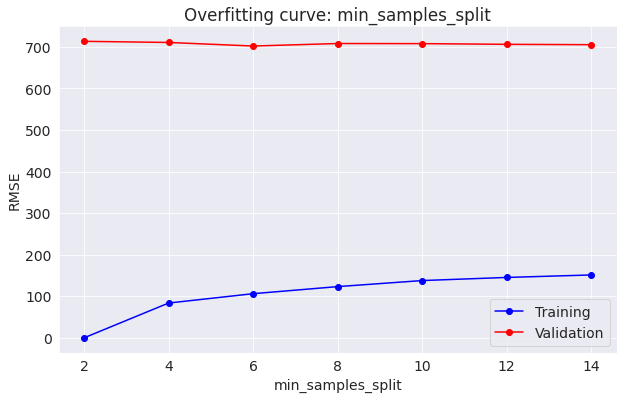

In [ ]:
test_param_and_plot('min_samples_split', [2, 4, 6,8, 10, 12, 14])

Now let's train the decision tree with tuned hyperparameters.

In [ ]:
tree_tuned = DecisionTreeRegressor(random_state=42, max_depth=10,min_samples_leaf=8,max_leaf_nodes=256,min_samples_split=6)

In [ ]:
tree_tuned.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=256, min_samples_leaf=8,
                      min_samples_split=6, random_state=42)

In [ ]:
tree_train_preds = tree_tuned.predict(train_inputs)
tree_train_rmse = mean_squared_error(tree_train_preds,train_targets,squared=False)
tree_val_preds = tree_tuned.predict(val_inputs)
tree_val_rmse = mean_squared_error(tree_val_preds,val_targets,squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 362.08118175372323, Validation RMSE: 698.5050263379168


Tuning doesnot give much improvement to the model.So we need a more powerful model for the problem.let us try gradient boosting.

# 2.Gradient Boosting

Now let's try to make a model using GBMs and see for any improvement.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42)

In [ ]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 14min 23s, sys: 1.59 s, total: 14min 25s
Wall time: 7min 32s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [ ]:
train_preds = model.predict(train_inputs)
train_rmse = mean_squared_error(train_preds,train_targets,squared=False)
val_preds = model.predict(val_inputs)
val_rmse = mean_squared_error(val_preds,val_targets,squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 261.2004753313276, Validation RMSE: 591.7170878918182


There seems to be   improvement with GBMs. Lets try to fine tune the hyperparamters to get a better result.

# **Hyperparamter Finetuning**

# 1. n_estimators

In [ ]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets,squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets,squared=False)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [ ]:
test_params(n_estimators=10)

Train RMSE: 396.95139740043936, Validation RMSE: 610.0528164978073


In [ ]:
test_params(n_estimators=30)

Train RMSE: 323.5582337425813, Validation RMSE: 568.6207016638992


In [ ]:
test_params(n_estimators=100)

Train RMSE: 261.2004753313276, Validation RMSE: 591.7170878918182


# 2. max_depth

In [ ]:
test_params(max_depth=2)

Train RMSE: 526.2179917362814, Validation RMSE: 744.4096654229769


In [ ]:
test_params(max_depth=5)

Train RMSE: 301.847887123143, Validation RMSE: 588.0410558094039


In [ ]:
test_params(max_depth=10)

Train RMSE: 153.9026236028453, Validation RMSE: 621.8895202435143


# 3. learning rate

In [ ]:
test_params(n_estimators=35, learning_rate=0.01)

Train RMSE: 791.844882617619, Validation RMSE: 1180.4343883612742


In [ ]:
test_params(n_estimators=35, learning_rate=0.1)

Train RMSE: 386.82001367211524, Validation RMSE: 618.0064106641794


In [ ]:
test_params(n_estimators=35, learning_rate=0.3)

Train RMSE: 311.80589654497106, Validation RMSE: 571.6082981785399


In [ ]:
test_params(n_estimators=35, learning_rate=0.9)

Train RMSE: 287.70537961463157, Validation RMSE: 670.6319586882917


Training the model woth custom parameters.

In [ ]:
model = XGBRegressor(random_state=42,n_estimators=35,learning_rate=0.33,max_depth=7)

In [ ]:
%%time
model.fit(train_inputs, train_targets)

CPU times: user 6min 7s, sys: 1.59 s, total: 6min 8s
Wall time: 3min 11s


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.33, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=35, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [ ]:
train_preds = model.predict(train_inputs)
train_rmse = mean_squared_error(train_preds,train_targets,squared=False)
val_preds = model.predict(val_inputs)
val_rmse = mean_squared_error(val_preds,val_targets,squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 270.9998427166161, Validation RMSE: 605.3054823489435


There seems to be not much further improvement.so lets use this model on the test set to get the results.

## Making Predictions on the Testset

In [ ]:
test_inputs

,store_nbr,onpromotion,cluster,dcoilwtico,Holiday,transferred,Month,Day,WeekOfYear,Year,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,family_DAIRY,family_DELI,family_EGGS,family_FROZEN FOODS,family_GROCERY I,family_GROCERY II,family_HARDWARE,family_HOME AND KITCHEN I,family_HOME AND KITCHEN II,family_HOME APPLIANCES,family_HOME CARE,family_LADIESWEAR,family_LAWN AND GARDEN,family_LINGERIE,"family_LIQUOR,WINE,BEER",family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,type_x_A,type_x_B,type_x_C,type_x_D,type_x_E
0,0.000000,0.000000,0.7500,0.161036,0.0,0.0,0.636364,0.5,0.615385,2017,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.000000,0.7500,0.161036,0.0,0.0,0.636364,0.5,0.615385,2017,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.008511,0.7500,0.161036,0.0,0.0,0.636364,0.5,0.615385,2017,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.085106,0.7500,0.161036,0.0,0.0,0.636364,0.5,0.615385,2017,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.7500,0.161036,0.0,0.0,0.636364,0.5,0.615385,2017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,0.150943,0.004255,0.3125,0.167083,0.0,0.0,0.636364,1.0,0.653846,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28508,0.150943,0.000000,0.3125,0.167083,0.0,0.0,0.636364,1.0,0.653846,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28509,0.150943,0.004255,0.3125,0.167083,0.0,0.0,0.636364,1.0,0.653846,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28510,0.150943,0.038298,0.3125,0.167083,0.0,0.0,0.636364,1.0,0.653846,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
test_inputs=test_inputs.drop(['family','type_x'],axis=1)

In [ ]:
test_preds = model.predict(test_inputs)

In [ ]:
test_preds

array([ -18.826183,  -11.425441, -119.45406 , ..., 1225.203   ,
         21.968342,   37.25618 ], dtype=float32)

In [ ]:
submission_df['Sales']  = test_preds

In [ ]:
submission_df

,id,sales,Sales
0,3000888,0.0,-18.826183
1,3000889,0.0,-11.425441
2,3000890,0.0,-119.454063
3,3000891,0.0,2343.410156
4,3000892,0.0,-8.973817
...,...,...,...
28507,3029395,0.0,524.799744
28508,3029396,0.0,78.497841
28509,3029397,0.0,1225.203003
28510,3029398,0.0,21.968342


## Summary and Conclusions

In this project we have tried to prediction of store sales(Time series data) using machine learning algorithms.The following are the two models that we used for the prediction:

1.Decision trees

2.Gradient Boosting Machines

Decision tree model showed some good validation accuracy but GBM had better accuracy. For both models we tried to fine tune the hyper-parameters for getting better results.we used Scikit learn and XGBoost libraries of python we modeling.We used the GBM model to get prediction on the test set too.

## Future works and References

We can try even improve the model using other techniques like K-Fold validation and fine tuning the hyperparamter even more but this requires more run time.We can also look into data even more to find more corelations and exploit it for better training

# References

1.https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms

2.https://scikit-learn.org/stable/

3.https://xgboost.readthedocs.io/en/stable/python/python_api.html

4.https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

